In [1]:
pip install pandas numpy mysql-connector-python


Note: you may need to restart the kernel to use updated packages.


In [1]:
import mysql.connector
import random
import string
import numpy as np
import pandas as pd

# Connect to MySQL
# Connect to MySQL database
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Simran45%",
    database=" repayment_data001"
)

cursor = conn.cursor()




C:\Users\SIMRAN\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:


# Function to generate random strings
def random_string(length=10):
    return ''.join(random.choice(string.ascii_letters) for _ in range(length))

# Function to generate random enum values
def random_enum(options):
    return random.choice(options)

# Generate correlated data
np.random.seed(42)

# Correlated data generation
data = {
    'age': np.random.randint(18, 70, 100),
    'gender': np.random.choice(['Male', 'Female', 'Other'], 100),
    'marital_status': np.random.choice(['Single', 'Married', 'Divorced', 'Widowed'], 100),
    'dependents': np.random.randint(0, 5, 100),
    'employment_status': np.random.choice(['Employed', 'Self-Employed', 'Unemployed', 'Retired', 'Student'], 100),
    'occupation': np.random.choice([
        'Administrative Assistant',
        'Software Developer',
        'Nurse',
        'Accountant',
        'Teacher',
        'Mechanical Engineer',
        'Sales Representative',
        'Chef',
        'Graphic Designer',
        'Construction Manager'], 100),
    'work_experience': np.random.randint(0, 30, 100),
    'employer': [random_string() if status in ['Employed', 'Self-Employed'] else '' for status in np.random.choice(['Employed', 'Self-Employed', 'Unemployed', 'Retired', 'Student'], 100)],
    'income': np.random.uniform(1000, 100000, 100),
    'employment_type': [random_enum(['Full-Time', 'Part-Time', 'Contractual']) for _ in range(100)],
    'credit_score': np.random.randint(300, 850, 100),
    'credit_utilization': np.random.uniform(0, 100, 100),
    'open_credit_accounts': np.random.randint(0, 10, 100),
    'payment_history': np.random.choice([
        'Monthly',
        'Quarterly',
        'Annually',
        'Bi-Annually',
        'Weekly',
        'Daily',
        'Bi-Weekly'], 100),
    'loan_type': [random_enum(['Personal', 'Auto', 'Mortgage', 'Education', 'Other']) for _ in range(100)],
    'loan_amount': np.random.uniform(1000, 100000, 100),
    'loan_term': np.random.randint(12, 360, 100),
    'interest_rate': np.random.uniform(1, 15, 100),
    'repayment_schedule': np.random.choice([
        'Monthly',
        'Quarterly',
        'Annually',
        'Bi-Annually',
        'Weekly',
        'Daily',
        'Bi-Weekly'], 100),
    'dti_ratio': np.random.uniform(0, 50, 100),
    'savings': np.random.uniform(0, 100000, 100),
    'investments': np.random.uniform(0, 100000, 100),
    'monthly_expenses': np.random.uniform(500, 10000, 100),
    'collateral_value': np.random.uniform(0, 1000000, 100),
    'collateral_type': np.random.choice([
        'Real Estate',
        'Vehicle',
        'Jewelry',
        'Stocks',
        'Bonds',
        'Savings Account',
        'Business Assets',
        'Art',
        'Collectibles',
        'None'], 100),
       'loan_purpose': np.random.choice([
        'Home Purchase',
        'Home Improvement',
        'Debt Consolidation',
        'Education',
        'Medical Expenses',
        'Car Purchase',
        'Business Expansion',
        'Travel',
        'Personal Expenses',
        'Emergency Fund'], 100),
        'spending_patterns': [random_string() for _ in range(100)],
        'account_activity': np.random.choice([
        'Regular Deposits',
        'Frequent Withdrawals',
        'Monthly Savings',
        'Large Transfers',
        'Online Purchases',
        'Bill Payments',
        'ATM Withdrawals',
        'Loan Repayments',
        'Investment Contributions',
        'Occasional Deposits'], 100),
        'repayment_status': np.random.choice(['On-Time', 'Late', 'Defaulted'], 100), 
    'location': [random_string() for _ in range(100)]
}

# Create DataFrame
df = pd.DataFrame(data)

# Define the columns for insertion
columns = [
    'age', 'gender', 'marital_status', 'dependents', 'employment_status', 'occupation', 
    'work_experience', 'employer', 'income', 'employment_type', 'credit_score', 
    'credit_utilization', 'open_credit_accounts', 'payment_history', 'loan_type', 
    'loan_amount', 'loan_term', 'interest_rate', 'repayment_schedule', 'dti_ratio', 
    'savings', 'investments', 'monthly_expenses', 'collateral_value', 'collateral_type', 
    'loan_purpose', 'spending_patterns', 'account_activity', 'location'
]

# Insert data into MySQL
for _, row in df.iterrows():
    cursor.execute(f"""
        INSERT INTO loan_repayment_probability001 (
            {', '.join(columns)}
        ) VALUES ({', '.join(['%s'] * len(columns))})
    """, tuple(row[col] for col in columns))

# Commit the transaction
conn.commit()

# Close the connection
cursor.close()
conn.close()


In [4]:
df.shape

(100, 30)

In [5]:
df['repayment_schedule']

0           Daily
1         Monthly
2     Bi-Annually
3       Bi-Weekly
4           Daily
         ...     
95          Daily
96      Quarterly
97          Daily
98      Quarterly
99      Bi-Weekly
Name: repayment_schedule, Length: 100, dtype: object

In [6]:
missing_values_summary = df.isnull().sum()
print(missing_values_summary)


age                     0
gender                  0
marital_status          0
dependents              0
employment_status       0
occupation              0
work_experience         0
employer                0
income                  0
employment_type         0
credit_score            0
credit_utilization      0
open_credit_accounts    0
payment_history         0
loan_type               0
loan_amount             0
loan_term               0
interest_rate           0
repayment_schedule      0
dti_ratio               0
savings                 0
investments             0
monthly_expenses        0
collateral_value        0
collateral_type         0
loan_purpose            0
spending_patterns       0
account_activity        0
repayment_status        0
location                0
dtype: int64


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   100 non-null    int32  
 1   gender                100 non-null    object 
 2   marital_status        100 non-null    object 
 3   dependents            100 non-null    int32  
 4   employment_status     100 non-null    object 
 5   occupation            100 non-null    object 
 6   work_experience       100 non-null    int32  
 7   employer              100 non-null    object 
 8   income                100 non-null    float64
 9   employment_type       100 non-null    object 
 10  credit_score          100 non-null    int32  
 11  credit_utilization    100 non-null    float64
 12  open_credit_accounts  100 non-null    int32  
 13  payment_history       100 non-null    object 
 14  loan_type             100 non-null    object 
 15  loan_amount           10

In [9]:
# Label Encoding
label_encoder = LabelEncoder()
categorical_columns = ['gender', 'marital_status', 'employment_status', 'employment_type', 'payment_history', 
                        'loan_type', 'repayment_schedule', 'collateral_type', 'loan_purpose', 
                        'spending_patterns', 'account_activity', 'location']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])


In [10]:
df.describe()

,age,gender,marital_status,dependents,employment_status,work_experience,income,employment_type,credit_score,credit_utilization,...,dti_ratio,savings,investments,monthly_expenses,collateral_value,collateral_type,loan_purpose,spending_patterns,account_activity,location
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,43.350000,1.170000,1.610000,1.850000,1.890000,14.770000,43521.428293,1.020000,578.420000,48.706383,...,25.039647,52466.374534,47341.622367,5405.126653,466032.576683,4.200000,3.960000,49.500000,4.590000,49.500000
std,14.904663,0.779212,1.179753,1.424001,1.230053,8.675817,26519.597793,0.816249,163.277614,27.454767,...,14.415416,28942.484104,27940.092928,2799.742605,300450.938477,3.011761,2.688997,29.011492,2.853653,29.011492
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2439.921901,0.000000,300.000000,1.220307,...,1.532625,493.998093,756.287498,745.213116,11031.264429,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.750000,1.000000,0.750000,0.000000,1.000000,7.000000,19844.354876,0.000000,438.750000,24.514634,...,11.858505,32642.132865,23327.083546,2931.952005,182424.009734,2.000000,2.000000,24.750000,2.000000,24.750000
50%,42.000000,1.000000,2.000000,2.000000,2.000000,14.000000,40044.947957,1.000000,592.000000,48.359723,...,24.761839,53904.582234,48470.870295,5424.027674,460462.116515,4.000000,3.000000,49.500000,4.500000,49.500000
75%,57.000000,2.000000,3.000000,3.000000,3.000000,23.250000,63298.275064,2.000000,711.250000,73.063410,...,36.598520,74440.819063,69311.325201,7920.243009,734550.054768,7.000000,6.000000,74.250000,7.000000,74.250000
max,69.000000,2.000000,3.000000,4.000000,4.000000,29.000000,98023.224953,2.000000,849.000000,99.769262,...,49.816696,99941.372577,99125.599370,9944.323932,996696.853853,9.000000,9.000000,99.000000,9.000000,99.000000


In [11]:
df = df.drop(['occupation', 'work_experience', 'employer', 'open_credit_accounts'], axis=1)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 100 non-null    int32  
 1   gender              100 non-null    int32  
 2   marital_status      100 non-null    int32  
 3   dependents          100 non-null    int32  
 4   employment_status   100 non-null    int32  
 5   income              100 non-null    float64
 6   employment_type     100 non-null    int32  
 7   credit_score        100 non-null    int32  
 8   credit_utilization  100 non-null    float64
 9   payment_history     100 non-null    int32  
 10  loan_type           100 non-null    int32  
 11  loan_amount         100 non-null    float64
 12  loan_term           100 non-null    int32  
 13  interest_rate       100 non-null    float64
 14  repayment_schedule  100 non-null    int32  
 15  dti_ratio           100 non-null    float64
 16  savings  

In [14]:
data = {
    'age',
    'income',
    'credit_score',
    'monthly_expenses',
    'loan_amount',
    'repayment_status',
}


In [18]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [19]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'repayment_status' column
df['repayment_status_encoded'] = label_encoder.fit_transform(df['repayment_status'])


In [20]:
df['repayment_status_encoded'] 

0     2
1     1
2     1
3     1
4     1
     ..
95    0
96    2
97    0
98    1
99    0
Name: repayment_status_encoded, Length: 100, dtype: int32

ValueError: could not convert string to float: 'On-Time'

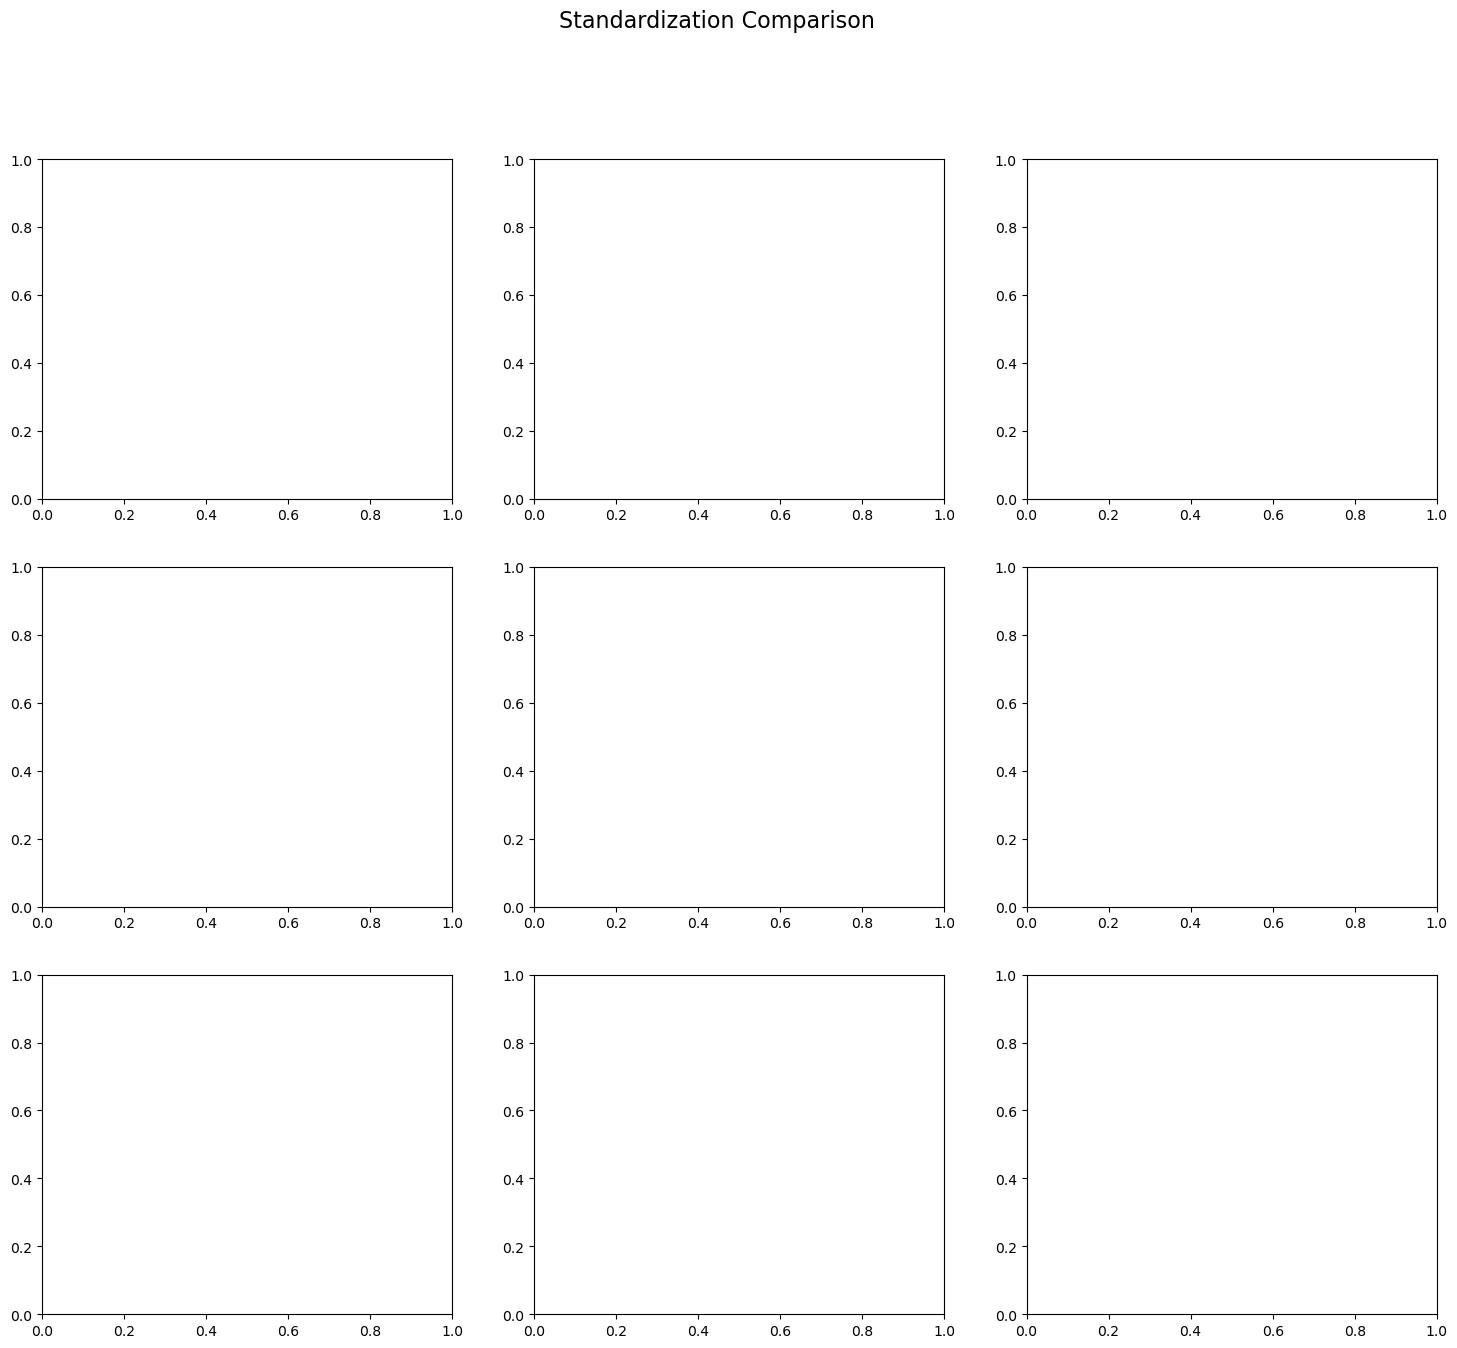

In [21]:
def apply_standardization(data):
    scalers = {
        'MinMaxScaler': MinMaxScaler(),
        'StandardScaler': StandardScaler(),
        'RobustScaler': RobustScaler()
    }
     
    num_features = len(df.columns)
    num_scalers = len(scalers) 
    
    fig, axes = plt.subplots(len(scalers), 3, figsize=(18, len(scalers) * 5))
    fig.suptitle('Standardization Comparison', fontsize=16)

    for i, (name, scaler) in enumerate(scalers.items()):
        # Apply scaling
        scaled_data = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
        
        # Plot original and scaled distributions
        for j, col in enumerate(df.columns):
            sns.histplot(df[col], kde=True, ax=axes[i, j], color='blue', label='Original')
            sns.histplot(scaled_data[col], kde=True, ax=axes[i, j], color='red', label='Scaled')
            axes[i, j].set_title(f'{name} - {col}')
            axes[i, j].legend()

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to avoid overlap
    plt.show()

    return df

# Apply and visualize different standardization methods
df_standardized = apply_standardization(data)

# Evaluate mean squared error for each scaler (example: comparing the scale)
def evaluate_scalers(df):
    original_mean = df.mean()
    scalers = {
        'MinMaxScaler': MinMaxScaler(),
        'StandardScaler': StandardScaler(),
        'RobustScaler': RobustScaler()
    }
    
    errors = {}

    for name, scaler in scalers.items():
        scaled_data = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
        scaled_mean = scaled_data.mean()
        error = mean_squared_error(original_mean, scaled_mean)
        errors[name] = error

    return errors

# Evaluate the effect of standardization
errors = evaluate_scalers(data)
print("Mean Squared Error for each standardization method:")
for scaler, error in errors.items():
    print(f"{scaler}: {error}")

In [22]:
X = df.drop('repayment_status', axis=1)
y = df['repayment_status']


In [23]:
from sklearn.ensemble import RandomForestClassifier

In [25]:


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)


print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.93
